In [47]:
import tensorflow as tf
from tensorflow.keras.applications import mobilenet_v2,MobileNetV2
from tensorflow.keras.layers import Dense, BatchNormalization,GaussianDropout,Dropout,SeparableConv2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import save_model,Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.losses import BinaryCrossentropy,MSE
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,RMSprop,Adagrad

import numpy as np

In [19]:
train_path=r"dataset"
val_path=r"Z:\covid19-repo\validation_set"

In [25]:
shape=150

seed=np.random.seed()

In [38]:

data=ImageDataGenerator(featurewise_center=False,samplewise_center=False,
                        featurewise_std_normalization=False,
                        samplewise_std_normalization=False,
                        zca_whitening=False,zca_epsilon=1e-06,
                        rotation_range=30,width_shift_range=0.0,
                        height_shift_range=0.0,brightness_range=None,
                        shear_range=0.0,zoom_range=0.2,channel_shift_range=0.0,
                        fill_mode="nearest",    cval=0.0,
                        horizontal_flip=True, vertical_flip=True,
                        rescale=1./255,
                        preprocessing_function=None, data_format=None,
                        validation_split=0.4,
                        dtype='float32')

train_data=data.flow_from_directory(train_path, target_size=(shape,shape,), color_mode="rgb",class_mode="categorical", batch_size=10, shuffle=False,seed=seed,
save_to_dir=None, save_prefix="",save_format="png",
follow_links=False,subset=None,
interpolation="nearest")

Found 13989 images belonging to 3 classes.


In [39]:
train_data.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [40]:
valdata=ImageDataGenerator(
                        rescale=1./255,
                        dtype='float32')

val_data=data.flow_from_directory(val_path, target_size=(shape,shape,), color_mode="rgb",
classes=lis,class_mode="categorical", batch_size=10, shuffle=False,seed=seed,
save_to_dir=None, save_prefix="",save_format="png",
follow_links=False,subset=None,
interpolation="nearest")

Found 1164 images belonging to 3 classes.


In [41]:
val_data.class_indices

{'covid': 0, 'normal': 1, 'viral pneumonia': 2}

model

In [43]:
basemodel = MobileNetV2(input_shape=(shape,shape,3),include_top=False,weights='imagenet')

In [49]:
basemodel.trainable=False

In [51]:
x=basemodel.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x)

In [52]:
model=Model(inputs=basemodel.input,outputs=preds)

In [53]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [54]:
epoch=30
opt=Adam(learning_rate=0.0001,decay=0.0001 / epoch)
model.compile(opt,loss='binary_crossentropy',metrics=['acc'])

In [55]:
from tensorflow.keras.utils import plot_model

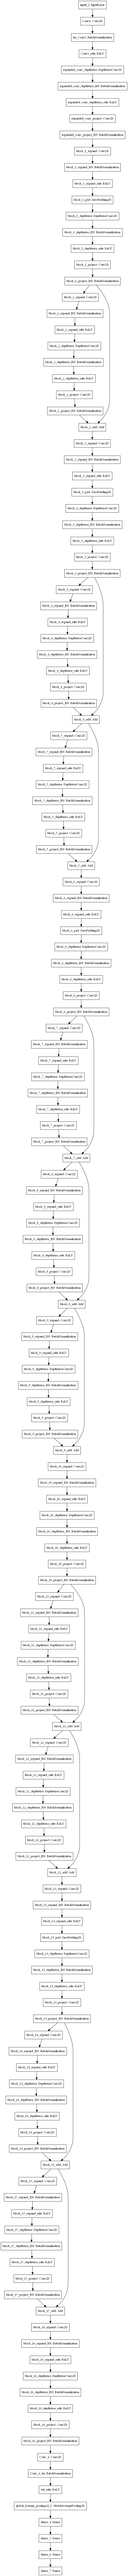

In [56]:
plot_model(model)

In [57]:
hist=model.fit_generator(train_data,epochs=epoch,validation_data=val_data)

c:\users\kesha\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
c:\users\kesha\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Epoch 1/30
1399/1399 [==============================] - 307s 217ms/step - loss: 0.2675 - acc: 0.8378 - val_loss: 0.2467 - val_acc: 0.8402
Epoch 2/30
1399/1399 [==============================] - 313s 223ms/step - loss: 0.2062 - acc: 0.8737 - val_loss: 0.4893 - val_acc: 0.6942
Epoch 3/30
1399/1399 [==============================] - 209s 149ms/step - loss: 0.1838 - acc: 0.8876 - val_loss: 0.3174 - val_acc: 0.7947
Epoch 4/30
1399/1399 [==============================] - 207s 148ms/step - loss: 0.1655 - acc: 0.9024 - val_loss: 0.3100 - val_acc: 0.8033
Epoch 5/30
1399/1399 [==============================] - 208s 149ms/step - loss: 0.1489 - acc: 0.9125 - val_loss: 0.1933 - val_acc: 0.8857
Epoch 6/30
1399/1399 [==============================] - 207s 148ms/step - loss: 0.1444 - acc: 0.9141 - val_loss: 0.2297 - val_acc: 0.8479
Epoch 7/30
1399/1399 [==============================] - 206s 147ms/step - loss: 0.1357 - acc: 0.9209 - val_loss: 0.1551 - val_acc: 0.9064
Epoch 8/30
1399/1399 [============

In [58]:
model.evaluate(val_data)

117/117 [==============================] - 13s 109ms/step - loss: 0.2042 - acc: 0.8840


[0.2042088508605957, 0.8840206265449524]

In [98]:
img=load_img(r"Z:\covid19-repo\dataset\Viral Pneumonia\Viral Pneumonia-831.png")

In [99]:
import cv2

img=img_to_array(img)/255
img=cv2.resize(img,(150,150))
img=img.reshape(-1,150,150,3)

In [100]:
img.shape


(1, 150, 150, 3)

In [101]:
pred=model.predict(img)

In [102]:
pred


array([[1.9511281e-05, 5.6348944e-07, 9.9997997e-01]], dtype=float32)

In [103]:
df=list(train_data.class_indices)

In [104]:
df[np.argmax(pred)]

'Viral Pneumonia'

In [83]:
model.save('covid_model.h5')

c:\users\kesha\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [84]:
from tensorflow.keras.models import load_model

In [86]:
pp=sf.predict(img)

In [87]:
df[np.argmax(pp)]

'Viral Pneumonia'

# tflite conversion

In [105]:
import tensorflow as tf

In [108]:
saf=load_model('mymodel.h5')

In [109]:
converter = tf.lite.TFLiteConverter.from_keras_model(sf)
tflite_model = converter.convert()
open("my_model.tflite", "wb").write(tflite_model)

c:\users\kesha\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: C:\Users\kesha\AppData\Local\Temp\tmp2qtf0j_h\assets


INFO:tensorflow:Assets written to: C:\Users\kesha\AppData\Local\Temp\tmp2qtf0j_h\assets


20411144

In [127]:
interpreter = tf.lite.Interpreter('covid_model.tflite')

In [133]:
interpreter.get_tensor_details()

[{'name': 'input_2',
  'index': 0,
  'shape': array([  1, 150, 150,   3]),
  'shape_signature': array([ -1, 150, 150,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'model/Conv_1_bn/FusedBatchNormV3;model/Conv_1/Conv2D',
  'index': 1,
  'shape': array([1280]),
  'shape_signature': array([1280]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'model/block_16_project_BN/FusedBatchNormV3;model/block_16_project/Conv2D',
  'index': 2,
  'shape': array([320]),
  'shape_signature': array([320]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_